# Data Gathering and Preparation

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# map directory to data folder (shortcut added to My Drive)
import os
shared_drive_path = '/content/drive/MyDrive/Data Mining Final Project_Group 9/Data'
os.listdir(shared_drive_path)

['EV_REGISTRATIONS_COUNTY-2.xlsx',
 'EV_REGISTRATIONS_ZIP-2.xlsx',
 'alt_fuel_stations (Dec 9 2024).csv',
 'PA_EV_Registrations.xlsx',
 'PA_Charging_Stations.xlsx',
 'PA_EV_Registrations.csv',
 'Final_Clustered_EV_Data.csv']

## EV Registrations by ZIP

In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
# load 2023 data
df1 = pd.read_excel(shared_drive_path+'/EV_REGISTRATIONS_ZIP-2.xlsx', sheet_name=0)
print(df1.shape)
df1

(1832, 30)


,ZIP,REGISTRATION_YEAR,HEV_Q1,PHEV_Q1,BEV_Q1,FUEL_CELL_Q1,TOTAL_EV_Q1,TOTAL_REG_Q1,PCT_EV_Q1,HEV_Q2,...,TOTAL_EV_Q3,TOTAL_REG_Q3,PCT_EV_Q3,HEV_Q4,PHEV_Q4,BEV_Q4,FUEL_CELL_Q4,TOTAL_EV_Q4,TOTAL_REG_Q4,PCT_EV_Q4
0,15001,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,390,...,115,<Null>,<Null>,413,54,70,0,124,29700,0.417508
1,15003,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,144,...,28,<Null>,<Null>,146,11,20,0,31,9382,0.33042
2,15004,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,3,...,0,<Null>,<Null>,3,0,0,0,0,1150,0
3,15005,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,205,...,91,<Null>,<Null>,224,26,78,0,104,10175,1.022113
4,15006,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,5,...,2,<Null>,<Null>,4,0,2,0,2,345,0.57971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,19607,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,434,...,114,<Null>,<Null>,453,56,75,0,131,20572,0.636788
1828,19608,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,640,...,202,<Null>,<Null>,685,88,137,0,225,23732,0.948087
1829,19609,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,173,...,49,<Null>,<Null>,190,19,29,0,48,9398,0.510747
1830,19610,2023,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,502,...,178,<Null>,<Null>,519,63,139,0,202,13914,1.451775


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ZIP                1832 non-null   int64 
 1   REGISTRATION_YEAR  1832 non-null   int64 
 2   HEV_Q1             1832 non-null   object
 3   PHEV_Q1            1832 non-null   object
 4   BEV_Q1             1832 non-null   object
 5   FUEL_CELL_Q1       1832 non-null   object
 6   TOTAL_EV_Q1        1832 non-null   object
 7   TOTAL_REG_Q1       1832 non-null   object
 8   PCT_EV_Q1          1832 non-null   object
 9   HEV_Q2             1832 non-null   int64 
 10  PHEV_Q2            1832 non-null   int64 
 11  BEV_Q2             1832 non-null   int64 
 12  FUEL_CELL_Q2       1832 non-null   int64 
 13  TOTAL_EV_Q2        1832 non-null   int64 
 14  TOTAL_REG_Q2       1832 non-null   object
 15  PCT_EV_Q2          1832 non-null   object
 16  HEV_Q3             1832 non-null   int64 


In [ ]:
# clean dataframe
selected_columns = ['ZIP', 'REGISTRATION_YEAR', 'TOTAL_EV_Q1', 'TOTAL_EV_Q2', 'TOTAL_EV_Q3', 'TOTAL_EV_Q4']
df1 = df1[selected_columns]

numeric_columns = ['TOTAL_EV_Q1', 'TOTAL_EV_Q2', 'TOTAL_EV_Q3', 'TOTAL_EV_Q4']
df1 = df1.replace('<Null>', np.nan)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIP                1832 non-null   int64  
 1   REGISTRATION_YEAR  1832 non-null   int64  
 2   TOTAL_EV_Q1        0 non-null      float64
 3   TOTAL_EV_Q2        1832 non-null   int64  
 4   TOTAL_EV_Q3        1832 non-null   int64  
 5   TOTAL_EV_Q4        1832 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 86.0 KB


<ipython-input-9-278555ea5aa6>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace('<Null>', np.nan)


In [ ]:
# compute Total_EV counts
df1['Total_EV'] = df1[numeric_columns].sum(axis=1)
df1

,ZIP,REGISTRATION_YEAR,TOTAL_EV_Q1,TOTAL_EV_Q2,TOTAL_EV_Q3,TOTAL_EV_Q4,Total_EV
0,15001,2023,NaN,115,115,124,354.0
1,15003,2023,NaN,28,28,31,87.0
2,15004,2023,NaN,0,0,0,0.0
3,15005,2023,NaN,91,91,104,286.0
4,15006,2023,NaN,2,2,2,6.0
...,...,...,...,...,...,...,...
1827,19607,2023,NaN,114,114,131,359.0
1828,19608,2023,NaN,202,202,225,629.0
1829,19609,2023,NaN,49,49,48,146.0
1830,19610,2023,NaN,178,178,202,558.0


In [ ]:
# load 2024 data
df2 = pd.read_excel(shared_drive_path+'/EV_REGISTRATIONS_ZIP-2.xlsx', sheet_name=1)
print(df2.shape)
df2

(1832, 30)


,ZIP,REGISTRATION_YEAR,HEV_Q1,PHEV_Q1,BEV_Q1,FUEL_CELL_Q1,TOTAL_EV_Q1,TOTAL_REG_Q1,PCT_EV_Q1,HEV_Q2,...,TOTAL_EV_Q3,TOTAL_REG_Q3,PCT_EV_Q3,HEV_Q4,PHEV_Q4,BEV_Q4,FUEL_CELL_Q4,TOTAL_EV_Q4,TOTAL_REG_Q4,PCT_EV_Q4
0,15001,2024,444,53,73,0,126,29427,0.428178,468,...,166,29515,0.562426,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
1,15003,2024,151,13,24,0,37,9353,0.395595,144,...,42,9377,0.447904,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
2,15004,2024,3,0,0,0,0,1141,0,3,...,1,1125,0.088889,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
3,15005,2024,245,29,83,0,112,10143,1.10421,254,...,152,10222,1.486989,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
4,15006,2024,5,0,2,0,2,343,0.58309,4,...,1,334,0.299401,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,19607,2024,472,61,72,0,133,20585,0.646102,508,...,158,21091,0.749135,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
1828,19608,2024,728,101,155,0,256,23759,1.077486,768,...,297,23807,1.247532,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
1829,19609,2024,201,19,37,0,56,9486,0.590344,207,...,67,9612,0.697045,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>
1830,19610,2024,547,72,149,0,221,13877,1.592563,573,...,249,13922,1.788536,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ZIP                1832 non-null   int64 
 1   REGISTRATION_YEAR  1832 non-null   int64 
 2   HEV_Q1             1832 non-null   object
 3   PHEV_Q1            1832 non-null   object
 4   BEV_Q1             1832 non-null   object
 5   FUEL_CELL_Q1       1832 non-null   object
 6   TOTAL_EV_Q1        1832 non-null   object
 7   TOTAL_REG_Q1       1832 non-null   object
 8   PCT_EV_Q1          1832 non-null   object
 9   HEV_Q2             1832 non-null   object
 10  PHEV_Q2            1832 non-null   object
 11  BEV_Q2             1832 non-null   object
 12  FUEL_CELL_Q2       1832 non-null   object
 13  TOTAL_EV_Q2        1832 non-null   object
 14  TOTAL_REG_Q2       1832 non-null   object
 15  PCT_EV_Q2          1832 non-null   object
 16  HEV_Q3             1832 non-null   object


In [ ]:
# clean dataframe
df2 = df2[selected_columns]
df2 = df2.replace('<Null>', np.nan)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIP                1832 non-null   int64  
 1   REGISTRATION_YEAR  1832 non-null   int64  
 2   TOTAL_EV_Q1        1830 non-null   float64
 3   TOTAL_EV_Q2        1830 non-null   float64
 4   TOTAL_EV_Q3        1830 non-null   float64
 5   TOTAL_EV_Q4        0 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 86.0 KB


<ipython-input-13-43100a6fdabb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace('<Null>', np.nan)


In [ ]:
# compute Total_EV counts
df2['Total_EV'] = df2[numeric_columns].sum(axis=1)
df2

,ZIP,REGISTRATION_YEAR,TOTAL_EV_Q1,TOTAL_EV_Q2,TOTAL_EV_Q3,TOTAL_EV_Q4,Total_EV
0,15001,2024,126.0,148.0,166.0,NaN,440.0
1,15003,2024,37.0,40.0,42.0,NaN,119.0
2,15004,2024,0.0,0.0,1.0,NaN,1.0
3,15005,2024,112.0,131.0,152.0,NaN,395.0
4,15006,2024,2.0,2.0,1.0,NaN,5.0
...,...,...,...,...,...,...,...
1827,19607,2024,133.0,144.0,158.0,NaN,435.0
1828,19608,2024,256.0,267.0,297.0,NaN,820.0
1829,19609,2024,56.0,61.0,67.0,NaN,184.0
1830,19610,2024,221.0,238.0,249.0,NaN,708.0


In [ ]:
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,ZIP,REGISTRATION_YEAR,TOTAL_EV_Q1,TOTAL_EV_Q2,TOTAL_EV_Q3,TOTAL_EV_Q4,Total_EV
0,15001,2023,NaN,115.0,115.0,124.0,354.0
1,15003,2023,NaN,28.0,28.0,31.0,87.0
2,15004,2023,NaN,0.0,0.0,0.0,0.0
3,15005,2023,NaN,91.0,91.0,104.0,286.0
4,15006,2023,NaN,2.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...
3659,19607,2024,133.0,144.0,158.0,NaN,435.0
3660,19608,2024,256.0,267.0,297.0,NaN,820.0
3661,19609,2024,56.0,61.0,67.0,NaN,184.0
3662,19610,2024,221.0,238.0,249.0,NaN,708.0


In [ ]:
# additional dataframe cleanup
df3 = df3[['ZIP', 'REGISTRATION_YEAR', 'Total_EV']]
df3[['ZIP', 'REGISTRATION_YEAR']] = df3[['ZIP', 'REGISTRATION_YEAR']].astype('str')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ZIP                3664 non-null   object 
 1   REGISTRATION_YEAR  3664 non-null   object 
 2   Total_EV           3664 non-null   float64
dtypes: float64(1), object(2)
memory usage: 86.0+ KB


<ipython-input-16-916ca6b9d31e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['ZIP', 'REGISTRATION_YEAR']] = df3[['ZIP', 'REGISTRATION_YEAR']].astype('str')


In [ ]:
df4 = df3.groupby('ZIP').agg(
    {
        'REGISTRATION_YEAR': lambda x: ' - '.join(sorted(set(x))),
        'Total_EV': 'sum'
    }
).reset_index()

df4

,ZIP,REGISTRATION_YEAR,Total_EV
0,15001,2023 - 2024,794.0
1,15003,2023 - 2024,206.0
2,15004,2023 - 2024,1.0
3,15005,2023 - 2024,681.0
4,15006,2023 - 2024,11.0
...,...,...,...
1827,19607,2023 - 2024,794.0
1828,19608,2023 - 2024,1449.0
1829,19609,2023 - 2024,330.0
1830,19610,2023 - 2024,1266.0


In [ ]:
df4.to_excel(shared_drive_path+'/PA_EV_Registrations.xlsx', index=False)

In [ ]:
df4.to_csv(shared_drive_path+'/PA_EV_Registrations.csv', index=False)

## Fuel Stations by ZIP

In [ ]:
# load dataset
df5 = pd.read_csv(shared_drive_path+'/alt_fuel_stations (Dec 9 2024).csv')
print(df5.shape)
df5

(1917, 75)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging,Funding Sources
0,ELEC,Giant Eagle - Market District Settlers Ridge,100 Settlers Ridge Centre Dr,Campbell Run Rd and Settler Ridge,Pittsburgh,PA,15205,NaN,412-788-5392,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
1,ELEC,Giant Eagle #43 - Pine Township,155 Towne Center Dr,NaN,Wexford,PA,15090,NaN,724-934-0155,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
2,ELEC,Eaton Corp,1000 Cherrington Pkwy,NaN,Moon,PA,15108,NaN,412-893-3300,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
3,ELEC,Rothrock Motor Sales,1648 Plaza Ln,Intersection of Route 22 and 15th Street.,Allentown,PA,18104,NaN,610-439-8485,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,ELEC,Courtesy Motor Sales,3100 Pleasant Valley Blvd,NaN,Altoona,PA,16602,NaN,814-944-2076,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,ELEC,SRCOG Human Service Center,"1705 Maple Street, Suite 100",NaN,Homestead,PA,15120,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1913,ELEC,FNB GARAGE FNB GARAGE 2,626 Washington Place,NaN,Pittsburgh,PA,15219,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1914,ELEC,FNB GARAGE FNB GARAGE 1,626 Washington Place,NaN,Pittsburgh,PA,15219,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1915,ELEC,Flying J 707,246 Allegheny Blvd,NaN,Brookville,PA,15825,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           1917 non-null   object 
 1   Station Name                             1917 non-null   object 
 2   Street Address                           1917 non-null   object 
 3   Intersection Directions                  569 non-null    object 
 4   City                                     1917 non-null   object 
 5   State                                    1917 non-null   object 
 6   ZIP                                      1917 non-null   int64  
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            1898 non-null   object 
 9   Status Code                              1917 non-null   object 
 10  Expected Date                            0 non-n

In [ ]:
# clean dataframe
selected_columns = [
    'Station Name', 'City', 'ZIP', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Network', 'Latitude', 'Longitude', 'Open Date',
    'EV Connector Types', 'Facility Type', 'Maximum Vehicle Class'
    ]

df5 = df5[selected_columns]
df5.head(5)

,Station Name,City,ZIP,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,Open Date,EV Connector Types,Facility Type,Maximum Vehicle Class
0,Giant Eagle - Market District Settlers Ridge,Pittsburgh,15205,NaN,1.0,NaN,Non-Networked,40.441450,-80.149752,11/17/11,J1772,GROCERY,LD
1,Giant Eagle #43 - Pine Township,Wexford,15090,NaN,2.0,NaN,Non-Networked,40.632138,-80.054285,11/17/11,J1772,GROCERY,LD
2,Eaton Corp,Moon,15108,NaN,2.0,NaN,Non-Networked,40.492883,-80.200182,1/17/12,J1772,OFFICE_BLDG,LD
3,Rothrock Motor Sales,Allentown,18104,NaN,3.0,NaN,Non-Networked,40.620508,-75.503287,1/31/12,J1772,CAR_DEALER,NaN
4,Courtesy Motor Sales,Altoona,16602,NaN,1.0,NaN,Non-Networked,40.487370,-78.401320,1/31/12,J1772,CAR_DEALER,LD


In [ ]:
!pip install uszipcode==0.2.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
#match zipcode to county (create new column)
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
def get_county(zip_code):
  try:
    zipcode = search.by_zipcode(zip_code)
    return zipcode.county
  except:
    return None
df5['county'] = df5['ZIP'].apply(get_county)

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


<ipython-input-24-5828d149cf58>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['county'] = df5['ZIP'].apply(get_county)


In [ ]:
df5['county'] = df5['county'].str.replace(' County', '')

<ipython-input-25-177aff8debd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['county'] = df5['county'].str.replace(' County', '')


In [ ]:
df5.head()

,Station Name,City,ZIP,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,Open Date,EV Connector Types,Facility Type,Maximum Vehicle Class,county
0,Giant Eagle - Market District Settlers Ridge,Pittsburgh,15205,NaN,1.0,NaN,Non-Networked,40.441450,-80.149752,11/17/11,J1772,GROCERY,LD,Allegheny
1,Giant Eagle #43 - Pine Township,Wexford,15090,NaN,2.0,NaN,Non-Networked,40.632138,-80.054285,11/17/11,J1772,GROCERY,LD,Allegheny
2,Eaton Corp,Moon,15108,NaN,2.0,NaN,Non-Networked,40.492883,-80.200182,1/17/12,J1772,OFFICE_BLDG,LD,Allegheny
3,Rothrock Motor Sales,Allentown,18104,NaN,3.0,NaN,Non-Networked,40.620508,-75.503287,1/31/12,J1772,CAR_DEALER,NaN,Lehigh
4,Courtesy Motor Sales,Altoona,16602,NaN,1.0,NaN,Non-Networked,40.487370,-78.401320,1/31/12,J1772,CAR_DEALER,LD,Blair


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station Name           1917 non-null   object 
 1   City                   1917 non-null   object 
 2   ZIP                    1917 non-null   int64  
 3   EV Level1 EVSE Num     4 non-null      float64
 4   EV Level2 EVSE Num     1637 non-null   float64
 5   EV DC Fast Count       305 non-null    float64
 6   EV Network             1917 non-null   object 
 7   Latitude               1917 non-null   float64
 8   Longitude              1917 non-null   float64
 9   Open Date              1914 non-null   object 
 10  EV Connector Types     1917 non-null   object 
 11  Facility Type          434 non-null    object 
 12  Maximum Vehicle Class  345 non-null    object 
 13  county                 1913 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 209.8+ 

In [ ]:
# create new column for total EV chargers
df5['Total EV Chargers'] = df5[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum(axis=1)

# convert 'Open Date' to datetime
df5['Open Date'] = pd.to_datetime(df5['Open Date'], errors='coerce')

df5.head(5)

<ipython-input-28-2368d7f93702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Total EV Chargers'] = df5[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum(axis=1)
<ipython-input-28-2368d7f93702>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['Open Date'] = pd.to_datetime(df5['Open Date'], errors='coerce')
<ipython-input-28-2368d7f93702>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Station Name,City,ZIP,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Network,Latitude,Longitude,Open Date,EV Connector Types,Facility Type,Maximum Vehicle Class,county,Total EV Chargers
0,Giant Eagle - Market District Settlers Ridge,Pittsburgh,15205,NaN,1.0,NaN,Non-Networked,40.441450,-80.149752,2011-11-17,J1772,GROCERY,LD,Allegheny,1.0
1,Giant Eagle #43 - Pine Township,Wexford,15090,NaN,2.0,NaN,Non-Networked,40.632138,-80.054285,2011-11-17,J1772,GROCERY,LD,Allegheny,2.0
2,Eaton Corp,Moon,15108,NaN,2.0,NaN,Non-Networked,40.492883,-80.200182,2012-01-17,J1772,OFFICE_BLDG,LD,Allegheny,2.0
3,Rothrock Motor Sales,Allentown,18104,NaN,3.0,NaN,Non-Networked,40.620508,-75.503287,2012-01-31,J1772,CAR_DEALER,NaN,Lehigh,3.0
4,Courtesy Motor Sales,Altoona,16602,NaN,1.0,NaN,Non-Networked,40.487370,-78.401320,2012-01-31,J1772,CAR_DEALER,LD,Blair,1.0


In [ ]:
df5.to_excel(shared_drive_path+'/PA_Charging_Stations.xlsx', index=False)

In [ ]:
df5.to_csv(shared_drive_path+'/PA_Charging_Stations.csv', index=False)

#Identify geographic clusters where EV adoption is growing or underserved.

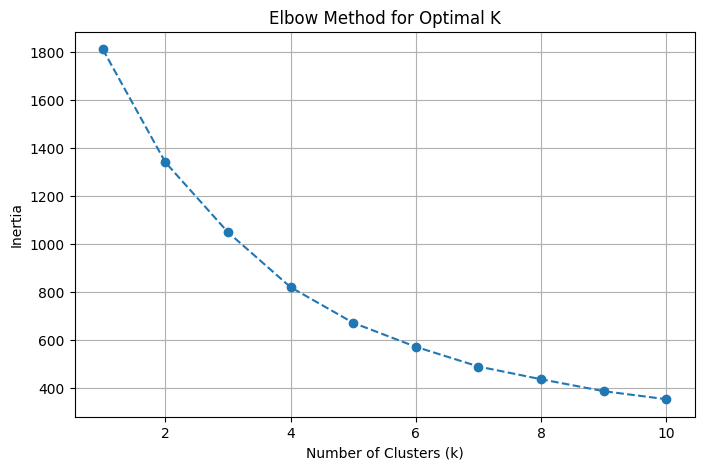

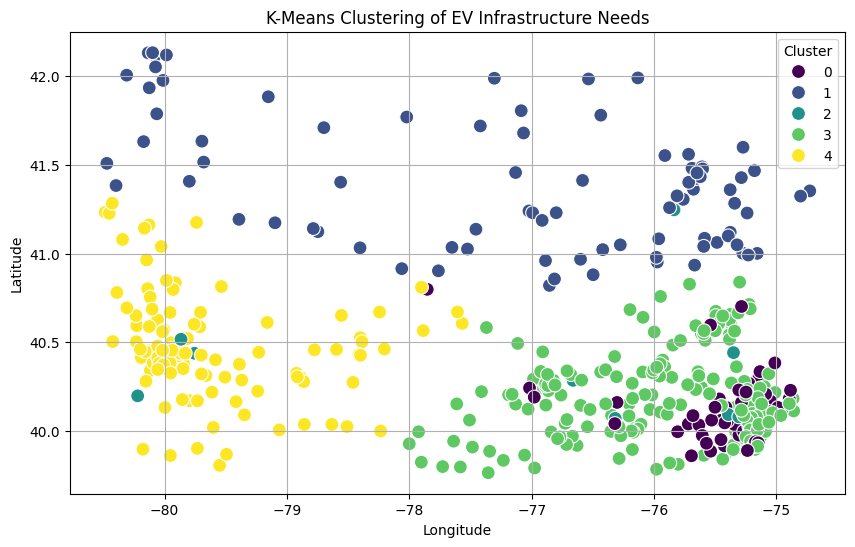

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ev_reg_df = pd.read_csv(shared_drive_path+'/PA_EV_Registrations.csv')  # EV registration data
charging_df = pd.read_csv(shared_drive_path+'/PA_Charging_Stations.csv')  # Charging stations data

# Clean up and merge datasets
# Aggregate total chargers per ZIP
charging_agg = charging_df.groupby('ZIP').agg({'Total EV Chargers': 'sum', 'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()

# Merge EV registration with charging station data
data = pd.merge(ev_reg_df, charging_agg, on='ZIP', how='left')

# Fill missing values for charging stations with 0
data['Total EV Chargers'] = data['Total EV Chargers'].fillna(0)

# Feature engineering: Select relevant features
data = data[['ZIP', 'Total_EV', 'Total EV Chargers', 'Latitude', 'Longitude']]
data = data.dropna()

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Total_EV', 'Total EV Chargers', 'Latitude', 'Longitude']])

# Elbow Method to determine optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Run K-Means with the optimal k
optimal_k = 5  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data, palette='viridis', s=100)
plt.title('K-Means Clustering of EV Infrastructure Needs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Save the clustered data
data.to_csv(shared_drive_path + '/EV_Clustered_Regions.csv', index=False)


Cluster Summary:
   Cluster  Total_EV_Mean  Total_EV_Median  Total_Chargers_Mean  \
0        0    3859.638298           3161.0            18.063830   
1        1     275.390805            171.0             7.080460   
2        2    1735.176471           1325.0            65.470588   
3        3     808.285714            675.0             8.058201   
4        4     677.584071            399.0             7.265487   

   Total_Chargers_Median  Latitude_Mean  Longitude_Mean  Count_ZIP  
0                   16.0      40.126434      -75.497253         47  
1                    4.0      41.394855      -77.112024         87  
2                   58.0      40.331400      -77.639506         17  
3                    6.0      40.180846      -75.946405        189  
4                    5.0      40.469581      -79.614552        113  


<ipython-input-34-73b3d3c45417>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Total_EV_Mean', data=cluster_summary, palette='viridis')


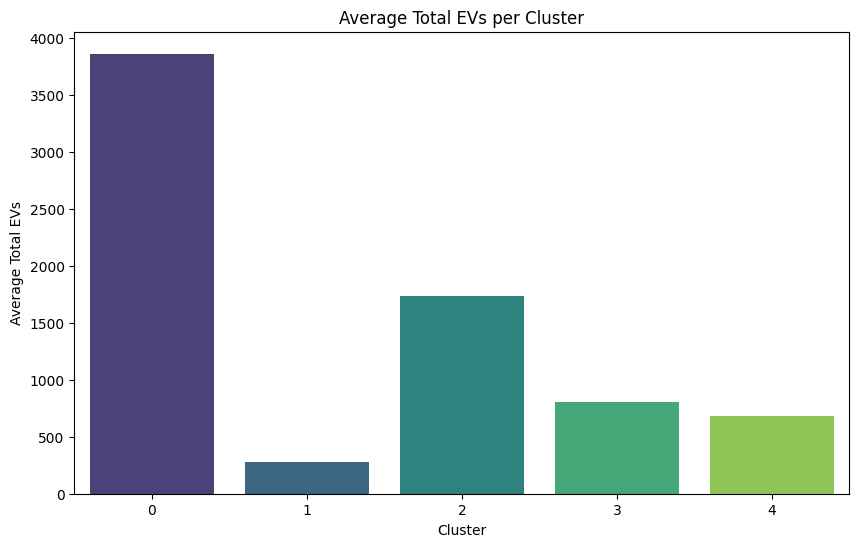

<ipython-input-34-73b3d3c45417>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Total_Chargers_Mean', data=cluster_summary, palette='viridis')


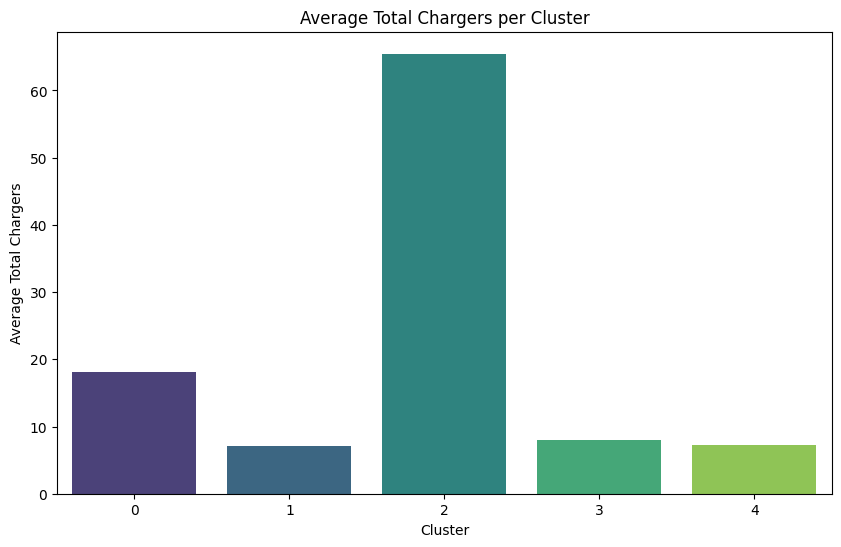

<ipython-input-34-73b3d3c45417>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Count_ZIP', data=cluster_summary, palette='viridis')


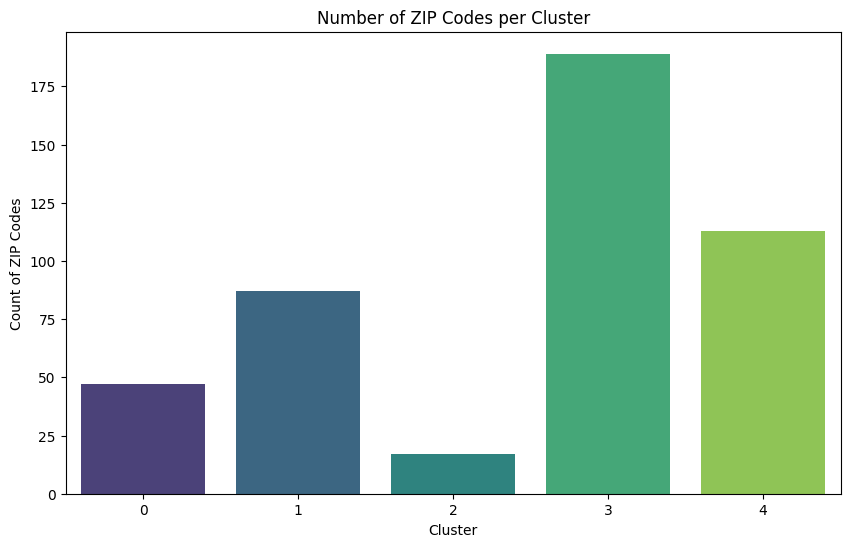

In [ ]:
# Group by Cluster and calculate summary statistics
cluster_summary = data.groupby('Cluster').agg(
    Total_EV_Mean=('Total_EV', 'mean'),
    Total_EV_Median=('Total_EV', 'median'),
    Total_Chargers_Mean=('Total EV Chargers', 'mean'),
    Total_Chargers_Median=('Total EV Chargers', 'median'),
    Latitude_Mean=('Latitude', 'mean'),
    Longitude_Mean=('Longitude', 'mean'),
    Count_ZIP=('ZIP', 'count')
).reset_index()

# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary)

# Save the summary to a CSV file
cluster_summary.to_csv(shared_drive_path + '/Cluster_Summary.csv', index=False)

# Optional: Visualize Total EV and Chargers per Cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Total EV per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Total_EV_Mean', data=cluster_summary, palette='viridis')
plt.title('Average Total EVs per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total EVs')
plt.show()

# Total Chargers per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Total_Chargers_Mean', data=cluster_summary, palette='viridis')
plt.title('Average Total Chargers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Chargers')
plt.show()

# Count of ZIP Codes per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count_ZIP', data=cluster_summary, palette='viridis')
plt.title('Number of ZIP Codes per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of ZIP Codes')
plt.show()


In [ ]:
data['EV_to_Chargers_Ratio'] = data['Total_EV'] / (data['Total EV Chargers'] + 1)  # Adding 1 to avoid division by zero

cluster_ratios = data.groupby('Cluster').agg(
    EV_to_Chargers_Ratio=('EV_to_Chargers_Ratio', 'mean'),
    Total_EV=('Total_EV', 'mean'),
    Total_Chargers=('Total EV Chargers', 'mean'),
    Count_ZIP=('ZIP', 'count')
).reset_index()

print(cluster_ratios)

   Cluster  EV_to_Chargers_Ratio     Total_EV  Total_Chargers  Count_ZIP
0        0            337.661533  3859.638298       18.063830         47
1        1             48.248330   275.390805        7.080460         87
2        2             29.331154  1735.176471       65.470588         17
3        3            136.278310   808.285714        8.058201        189
4        4             92.344858   677.584071        7.265487        113


##Visualization Enhancements

In [ ]:
import folium

# Convert Cluster column to integer
data['Cluster'] = data['Cluster'].astype(int)

# Create base map
map_clusters = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=7)

# Add clusters to the map
for _, row in data.iterrows():
    cluster_index = int(row['Cluster'])  # Explicitly cast to integer
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=['red', 'blue', 'green', 'purple', 'orange'][cluster_index],  # Color by cluster
        fill=True,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>EVs: {row['Total_EV']}<br>Chargers: {row['Total EV Chargers']}"
    ).add_to(map_clusters)



###Plot map

In [ ]:
from IPython.display import display

# Generate the map inline
map_clusters = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=7)

# Add clusters to the map
for _, row in data.iterrows():
    cluster_index = int(row['Cluster'])  # Explicitly cast to integer
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=['red', 'blue', 'green', 'purple', 'orange'][cluster_index],  # Color by cluster
        fill=True,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>EVs: {row['Total_EV']}<br>Chargers: {row['Total EV Chargers']}"
    ).add_to(map_clusters)

# Display map in the notebook
display(map_clusters)

In [ ]:
# Save the clustered data from previous step
data.to_csv(shared_drive_path + '/Final_Clustered_EV_Data.csv', index=False)
print("Clustered data saved as 'Final_Clustered_EV_Data.csv'")

Clustered data saved as 'Final_Clustered_EV_Data.csv'


#Predict the likelihood of a ZIP or county needing new EV stations.

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        93
           1       0.88      0.88      0.88        43

    accuracy                           0.93       136
   macro avg       0.91      0.91      0.91       136
weighted avg       0.93      0.93      0.93       136

Confusion Matrix (Decision Tree):
[[88  5]
 [ 5 38]]


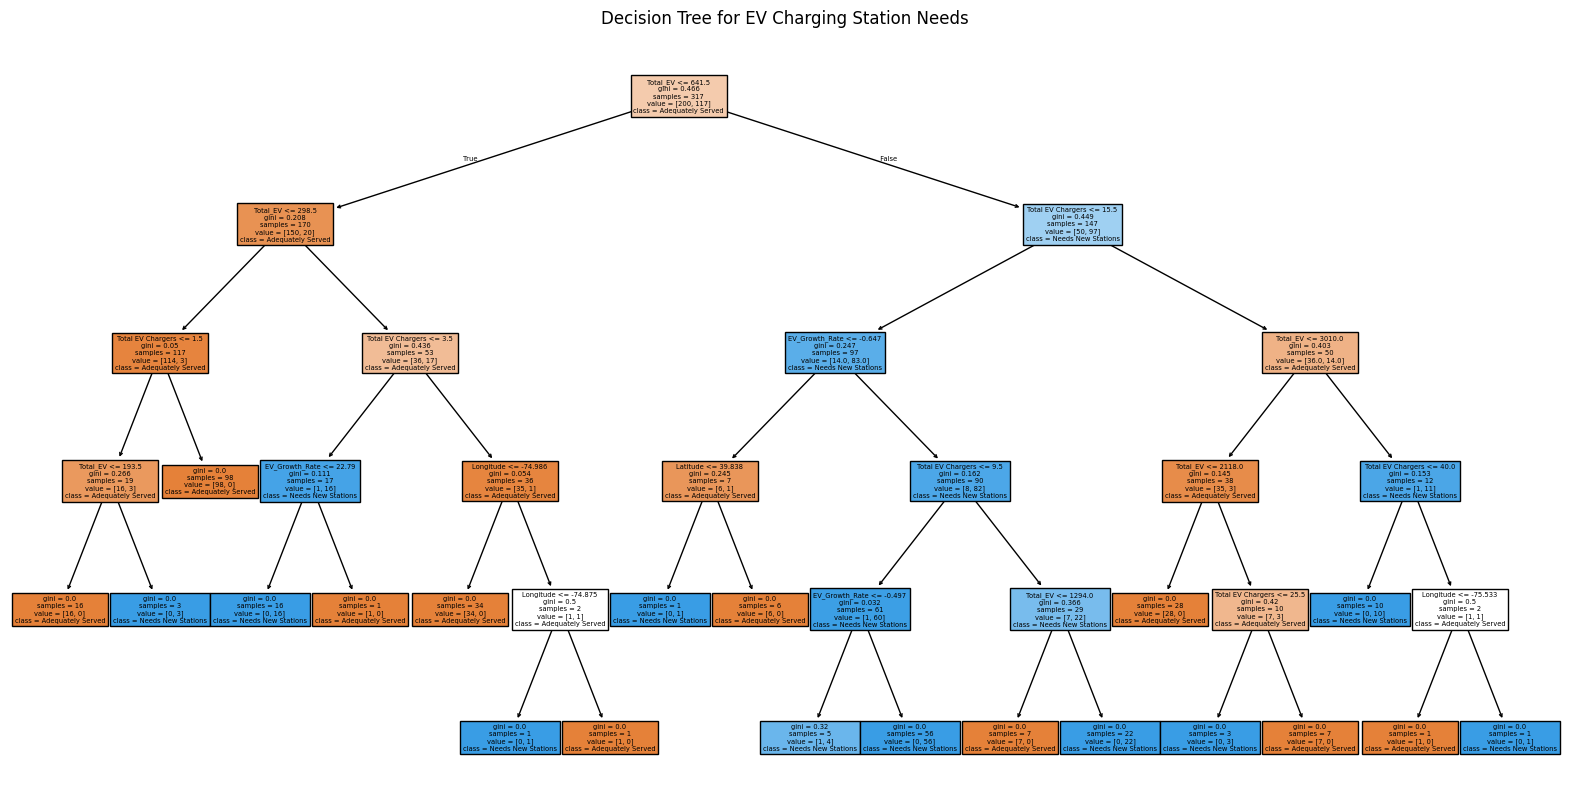

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        93
           1       0.89      0.91      0.90        43

    accuracy                           0.93       136
   macro avg       0.92      0.93      0.92       136
weighted avg       0.93      0.93      0.93       136

Confusion Matrix (Random Forest):
[[88  5]
 [ 4 39]]


<ipython-input-49-86c84fce5d8d>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


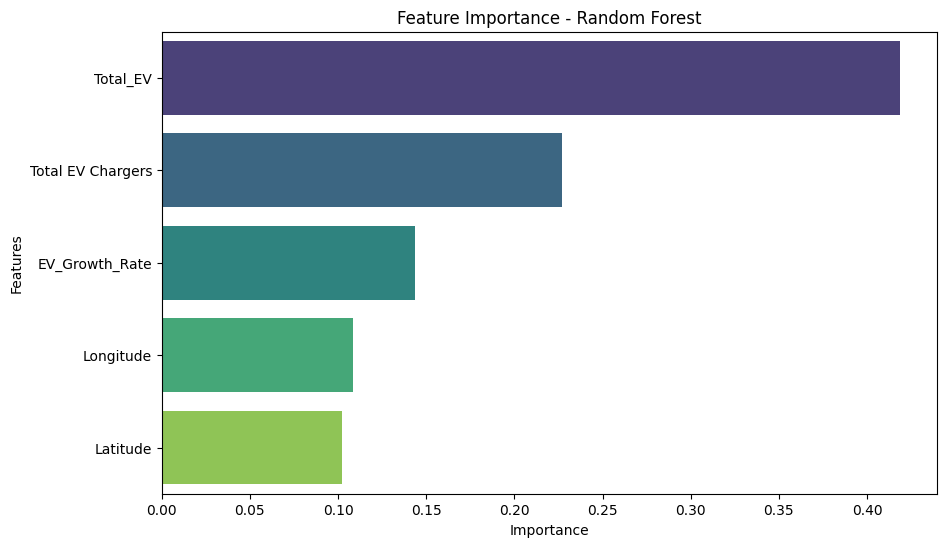

Predictions saved to 'EV_Needs_Stations_Predictions.csv'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved clustered data
data = pd.read_csv(shared_drive_path + '/Final_Clustered_EV_Data.csv')

# Step 1: Feature Engineering
# Calculate EV growth rate using pct_change
data['EV_Growth_Rate'] = data['Total_EV'].pct_change().fillna(0)

# Define the target variable: Needs new stations (binary classification)
# Create a threshold for underserved areas (e.g., EV-to-charger ratio > 100)
data['Needs_New_Stations'] = (data['EV_to_Chargers_Ratio'] > 100).astype(int)

# Step 2: Feature Preparation
# Select features and target
features = ['Total_EV', 'EV_Growth_Rate', 'Total EV Chargers', 'Latitude', 'Longitude']
target = 'Needs_New_Stations'

# Replace inf and NaN in features
X = data[features].replace([np.inf, -np.inf], np.nan)  # Replace infinities with NaN
X = X.fillna(0)  # Replace NaN with 0 (can use other imputation methods)
y = data[target]

# Check for non-finite values
assert np.isfinite(X).all().all(), "Feature matrix X contains non-finite values!"

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=features, class_names=["Adequately Served", "Needs New Stations"], filled=True)
plt.title("Decision Tree for EV Charging Station Needs")
plt.show()

# Step 5: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Step 6: Feature Importance Plot
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 7: Save Results and Predictions
data['Prediction_RF'] = rf_model.predict(X)
data.to_csv(shared_drive_path + '/EV_Needs_Stations_Predictions.csv', index=False)
print("Predictions saved to 'EV_Needs_Stations_Predictions.csv'")


#Predict the probability of a ZIP or county needing charging infrastructure.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      0.98      0.99        43

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136



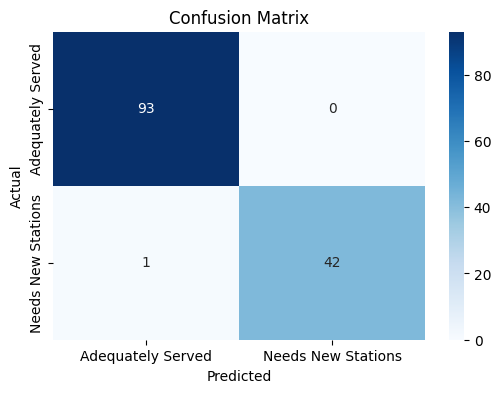

Logistic Regression Coefficients:
             Feature  Coefficient
1           Total_EV     0.033617
0     EV_Growth_Rate    -0.023170
2  Total EV Chargers    -3.317015


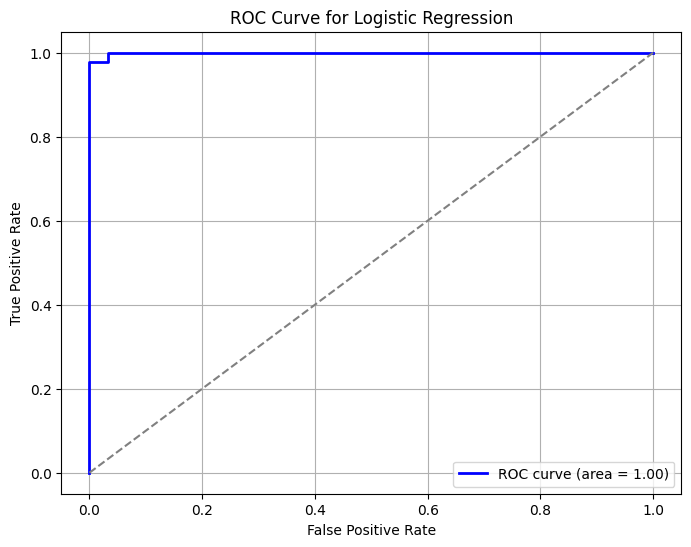

Logistic Regression predictions saved to 'EV_Logistic_Predictions.csv'


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared dataset
data = pd.read_csv(shared_drive_path + '/Final_Clustered_EV_Data.csv')

# Step 1: Feature Engineering
# Calculate EV Growth Rate and handle division-by-zero or invalid values
data['EV_Growth_Rate'] = data['Total_EV'].pct_change().fillna(0).replace([np.inf, -np.inf], 0)

# Create target variable: 1 = Needs new stations, 0 = Adequately served
data['Needs_New_Stations'] = (data['EV_to_Chargers_Ratio'] > 100).astype(int)

# Select predictors and target
features = ['EV_Growth_Rate', 'Total_EV', 'Total EV Chargers']
target = 'Needs_New_Stations'

# Check for NaNs or invalid values in features
X = data[features].replace([np.inf, -np.inf], 0).fillna(0)
y = data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Logistic Regression Model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Adequately Served', 'Needs New Stations'],
            yticklabels=['Adequately Served', 'Needs New Stations'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 5: Coefficient Analysis
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': logreg.coef_[0]})
print("Logistic Regression Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

# Step 6: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Step 7: Save Results
data['Prediction_Logistic'] = logreg.predict(X)
data.to_csv(shared_drive_path + '/EV_Logistic_Predictions.csv', index=False)
print("Logistic Regression predictions saved to 'EV_Logistic_Predictions.csv'")


#Create a high-performance model to predict the optimal ZIPs for EV stations.

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.93      0.95      0.94        43

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:14:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


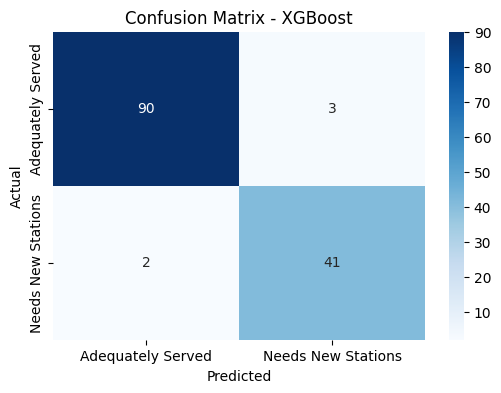

ROC-AUC Score: 1.00


<ipython-input-61-8567ff85c2fc>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


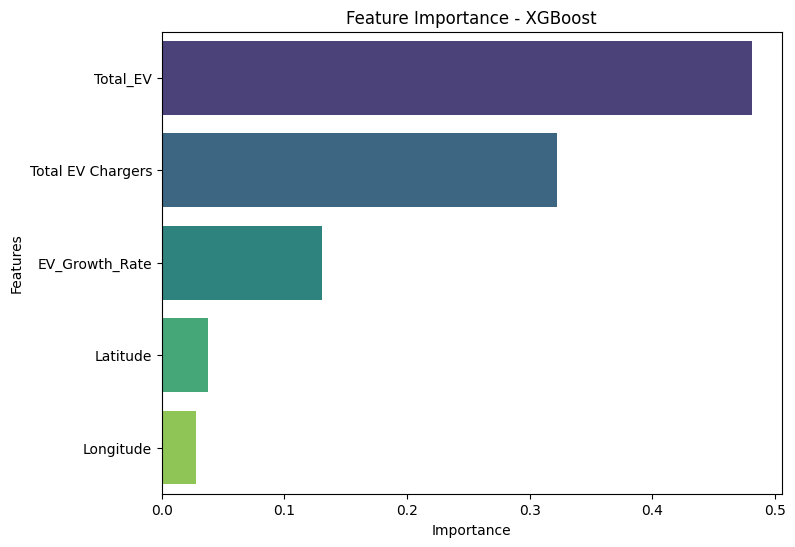

High-Priority ZIP Codes for New Charging Stations:
       ZIP  Total_EV  Total EV Chargers  EV_Growth_Rate
1    15005     681.0                4.0        3.305825
2    15009     651.0                2.0        0.955947
3    15010     678.0                1.0        1.041475
7    15044    2691.0                8.0       47.210526
10   15068     826.0                4.0        4.417112
..     ...       ...                ...             ...
447  19605     726.0                4.0        3.089362
448  19606    1437.0                8.0        1.979339
449  19607     794.0                3.0        0.552540
450  19608    1449.0                2.0        1.824937
451  19609     330.0                2.0        0.227743

[161 rows x 4 columns]
High-priority ZIPs saved to 'High_Priority_ZIPs.csv'


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
data = pd.read_csv(shared_drive_path + '/Final_Clustered_EV_Data.csv')

# Step 1: Feature Engineering
# Calculate EV Growth Rate
data['EV_Growth_Rate'] = (data['Total_EV'] / data['Total_EV'].shift(1)).replace([np.inf, -np.inf], np.nan).fillna(0)

# Define target variable: 1 = Needs New Stations, 0 = Adequately Served
data['Needs_New_Stations'] = (data['EV_to_Chargers_Ratio'] > 100).astype(int)

# Replace infinite values and NaN
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

# Define features and target
features = ['EV_Growth_Rate', 'Total_EV', 'Total EV Chargers', 'Latitude', 'Longitude']
target = 'Needs_New_Stations'

X = data[features]
y = data[target]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: XGBoost Model Training and Hyperparameter Tuning
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Step 4: Model Evaluation
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Adequately Served', 'Needs New Stations'],
            yticklabels=['Adequately Served', 'Needs New Stations'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 5: Feature Importance
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 6: Generate High-Priority ZIP List
data['Prediction_XGBoost'] = best_model.predict(X)
high_priority = data[data['Prediction_XGBoost'] == 1]

print("High-Priority ZIP Codes for New Charging Stations:")
print(high_priority[['ZIP', 'Total_EV', 'Total EV Chargers', 'EV_Growth_Rate']])

# Save results
high_priority.to_csv(shared_drive_path + '/High_Priority_ZIPs.csv', index=False)
print("High-priority ZIPs saved to 'High_Priority_ZIPs.csv'")


#Forecast EV adoption trends for future infrastructure planning.

<ipython-input-62-5dcecc7fe19e>:17: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  time_series.index = pd.date_range(start="2023-01", periods=len(time_series), freq='Q')


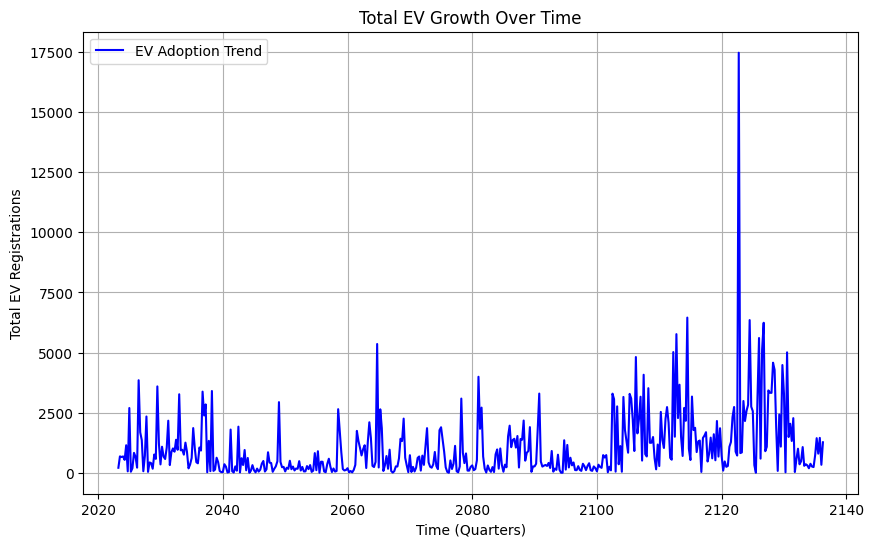

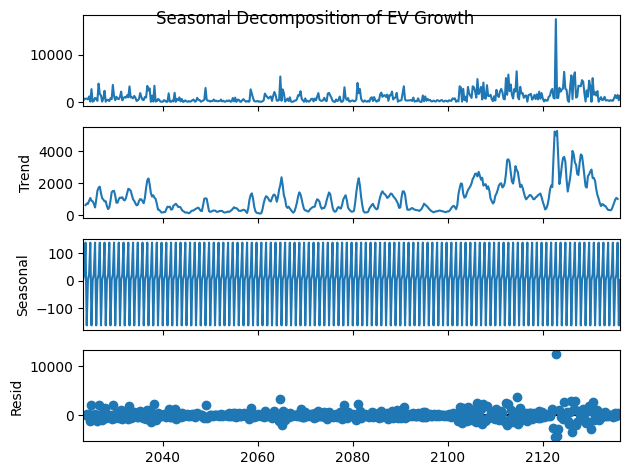

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing Forecast:
2136-06-30    1060.905274
2136-09-30    1290.827105
2136-12-31     596.887886
2137-03-31     740.958218
Freq: QE-DEC, dtype: float64


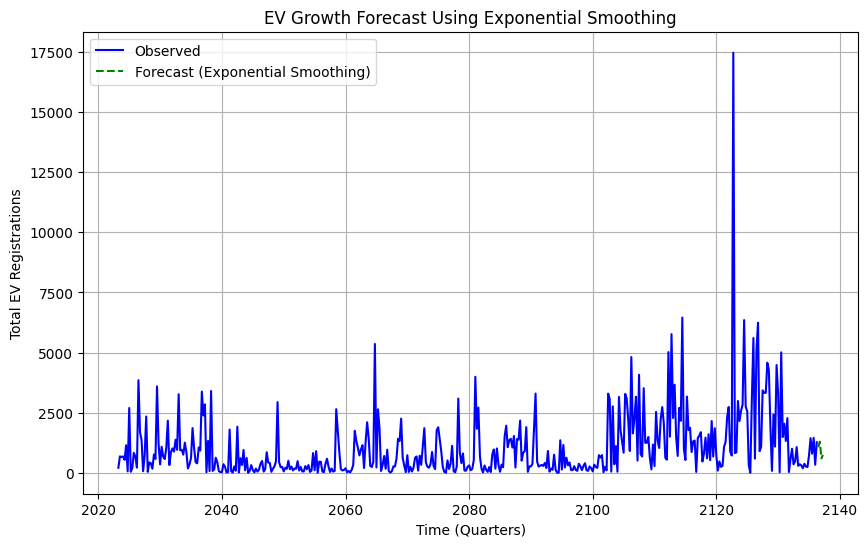

ARIMA Forecast:
2136-06-30    858.012811
2136-09-30    875.710933
2136-12-31    874.943205
2137-03-31    874.976508
Freq: QE-DEC, Name: predicted_mean, dtype: float64


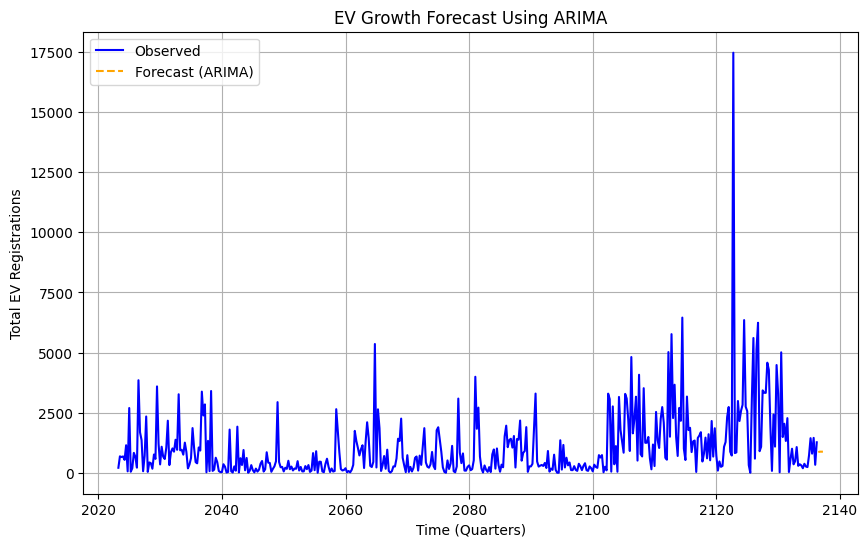

Model Evaluation:
Exponential Smoothing RMSE: 332.85
ARIMA RMSE: 442.33


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import math

# Load the EV data (ensure it has TOTAL_EV data over quarters and a time index)
data = pd.read_csv(shared_drive_path + '/Final_Clustered_EV_Data.csv')

# Step 1: Prepare Time-Series Data
# Aggregate TOTAL_EV over quarters (simulate a time-series dataset)
time_series = data[['Total_EV']].groupby(data.index).sum()  # Replace index logic if time data is explicit
time_series.index = pd.date_range(start="2023-01", periods=len(time_series), freq='Q')
time_series.rename(columns={'Total_EV': 'EV_Count'}, inplace=True)

# Plot the original time-series data
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='EV Adoption Trend', color='blue')
plt.title('Total EV Growth Over Time')
plt.xlabel('Time (Quarters)')
plt.ylabel('Total EV Registrations')
plt.legend()
plt.grid()
plt.show()

# Step 2: Decomposition of Time-Series
decomposition = seasonal_decompose(time_series, model='additive', period=4)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of EV Growth')
plt.show()

# Step 3: Exponential Smoothing
model_es = ExponentialSmoothing(time_series, seasonal='additive', seasonal_periods=4)
fit_es = model_es.fit()

# Forecast the next 4 quarters
forecast_es = fit_es.forecast(steps=4)
print("Exponential Smoothing Forecast:")
print(forecast_es)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed', color='blue')
plt.plot(forecast_es, label='Forecast (Exponential Smoothing)', color='green', linestyle='--')
plt.title('EV Growth Forecast Using Exponential Smoothing')
plt.xlabel('Time (Quarters)')
plt.ylabel('Total EV Registrations')
plt.legend()
plt.grid()
plt.show()

# Step 4: ARIMA Model
# Fit ARIMA model (parameters: p=1, d=1, q=1 for simplicity)
model_arima = ARIMA(time_series, order=(1, 1, 1))
fit_arima = model_arima.fit()

# Forecast the next 4 quarters
forecast_arima = fit_arima.forecast(steps=4)
print("ARIMA Forecast:")
print(forecast_arima)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed', color='blue')
plt.plot(forecast_arima, label='Forecast (ARIMA)', color='orange', linestyle='--')
plt.title('EV Growth Forecast Using ARIMA')
plt.xlabel('Time (Quarters)')
plt.ylabel('Total EV Registrations')
plt.legend()
plt.grid()
plt.show()

# Step 5: Model Evaluation (Mean Squared Error)
# Exponential Smoothing Error
actual = time_series[-4:].values  # Replace with actual if known
forecast_es_values = forecast_es.values
mse_es = mean_squared_error(actual, forecast_es_values)
rmse_es = math.sqrt(mse_es)

# ARIMA Error
forecast_arima_values = forecast_arima.values
mse_arima = mean_squared_error(actual, forecast_arima_values)
rmse_arima = math.sqrt(mse_arima)

# Print Evaluation Summary
print("Model Evaluation:")
print(f"Exponential Smoothing RMSE: {rmse_es:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")
